The Avila data set has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copylist.

additional Information

Data have been normalized by using the Z-normalization method and divided into two data sets: a training set containing 10430 samples, and a test set containing the 10437 samples.

CLASS DISTRIBUTION (training set)
A: 4286
B: 5
C: 103 
D: 352 
E: 1095 
F: 1961 
G: 446 
H: 519
I: 831
W: 44
X: 522 
Y: 266

Has Missing Values?

No

Attribute Information

F1: intercolumnar distance 
F2: upper margin 
F3: lower margin 
F4: exploitation 
F5: row number 
F6: modular ratio 
F7: interlinear spacing 
F8: weight 
F9: peak number 
F10: modular ratio/ interlinear spacing
Class: A, B, C, D, E, F, G, H, I, W, X, Y

# Problem statement

To identify the letters of the English alphabet, from the Avila Bible's sample containing 10437 characters.

In [19]:
%matplotlib inline 
##tells the IPython environment to draw the plots immediately after the current cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 a
import warnings
warnings.filterwarnings("ignore")

# Importing data

In [11]:
columns=['intercolumnar_distance','upper_margin','lower_margin','exploitation','row_number','modular_ratio','interlinear_spacing','weight','peak_number','modular ratio/interlinear spacing','class']

tr=pd.read_csv("avila-tr.csv",header=None,names=columns)
ts=pd.read_csv("avila-ts.csv",header=None,names=columns)

# (header=None) means we don't want to take header from the file

In [12]:
tr.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular ratio/interlinear spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


# Brief exploration of the data

In [14]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar_distance             10430 non-null  float64
 1   upper_margin                       10430 non-null  float64
 2   lower_margin                       10430 non-null  float64
 3   exploitation                       10430 non-null  float64
 4   row_number                         10430 non-null  float64
 5   modular_ratio                      10430 non-null  float64
 6   interlinear_spacing                10430 non-null  float64
 7   weight                             10430 non-null  float64
 8   peak_number                        10430 non-null  float64
 9   modular ratio/interlinear spacing  10430 non-null  float64
 10  class                              10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


<li>There are no null values that ned to be treated </li>
<li>All of the features are folating point values</li>
<li>We have 10429 instances and 11 columns</li>

In [23]:
pd.DataFrame({'tr-data':tr['class'].value_counts(),"%in tr-data":[round(x/len(tr['class']),4) for x in tr['class'].value_counts()],
              'ts-data':ts['class'].value_counts(),"%in ts-data":[round(x/len(ts['class']),4)for x in ts['class'].value_counts()]})

,tr-data,%in tr-data,ts-data,%in ts-data
A,4286,0.4109,4286,0.4107
F,1961,0.1880,1962,0.1880
E,1095,0.1050,1095,0.1049
I,831,0.0797,832,0.0797
X,522,0.0500,522,0.0500
H,519,0.0498,520,0.0498
G,446,0.0428,447,0.0428
D,352,0.0337,353,0.0338
Y,266,0.0255,267,0.0256
C,103,0.0099,103,0.0099


<li>The above numbers tell us the class distribution of the both datasets</li>
<li>The classes are very imbalanced only two classes constitute the 60% of the data (means A & F) </li>

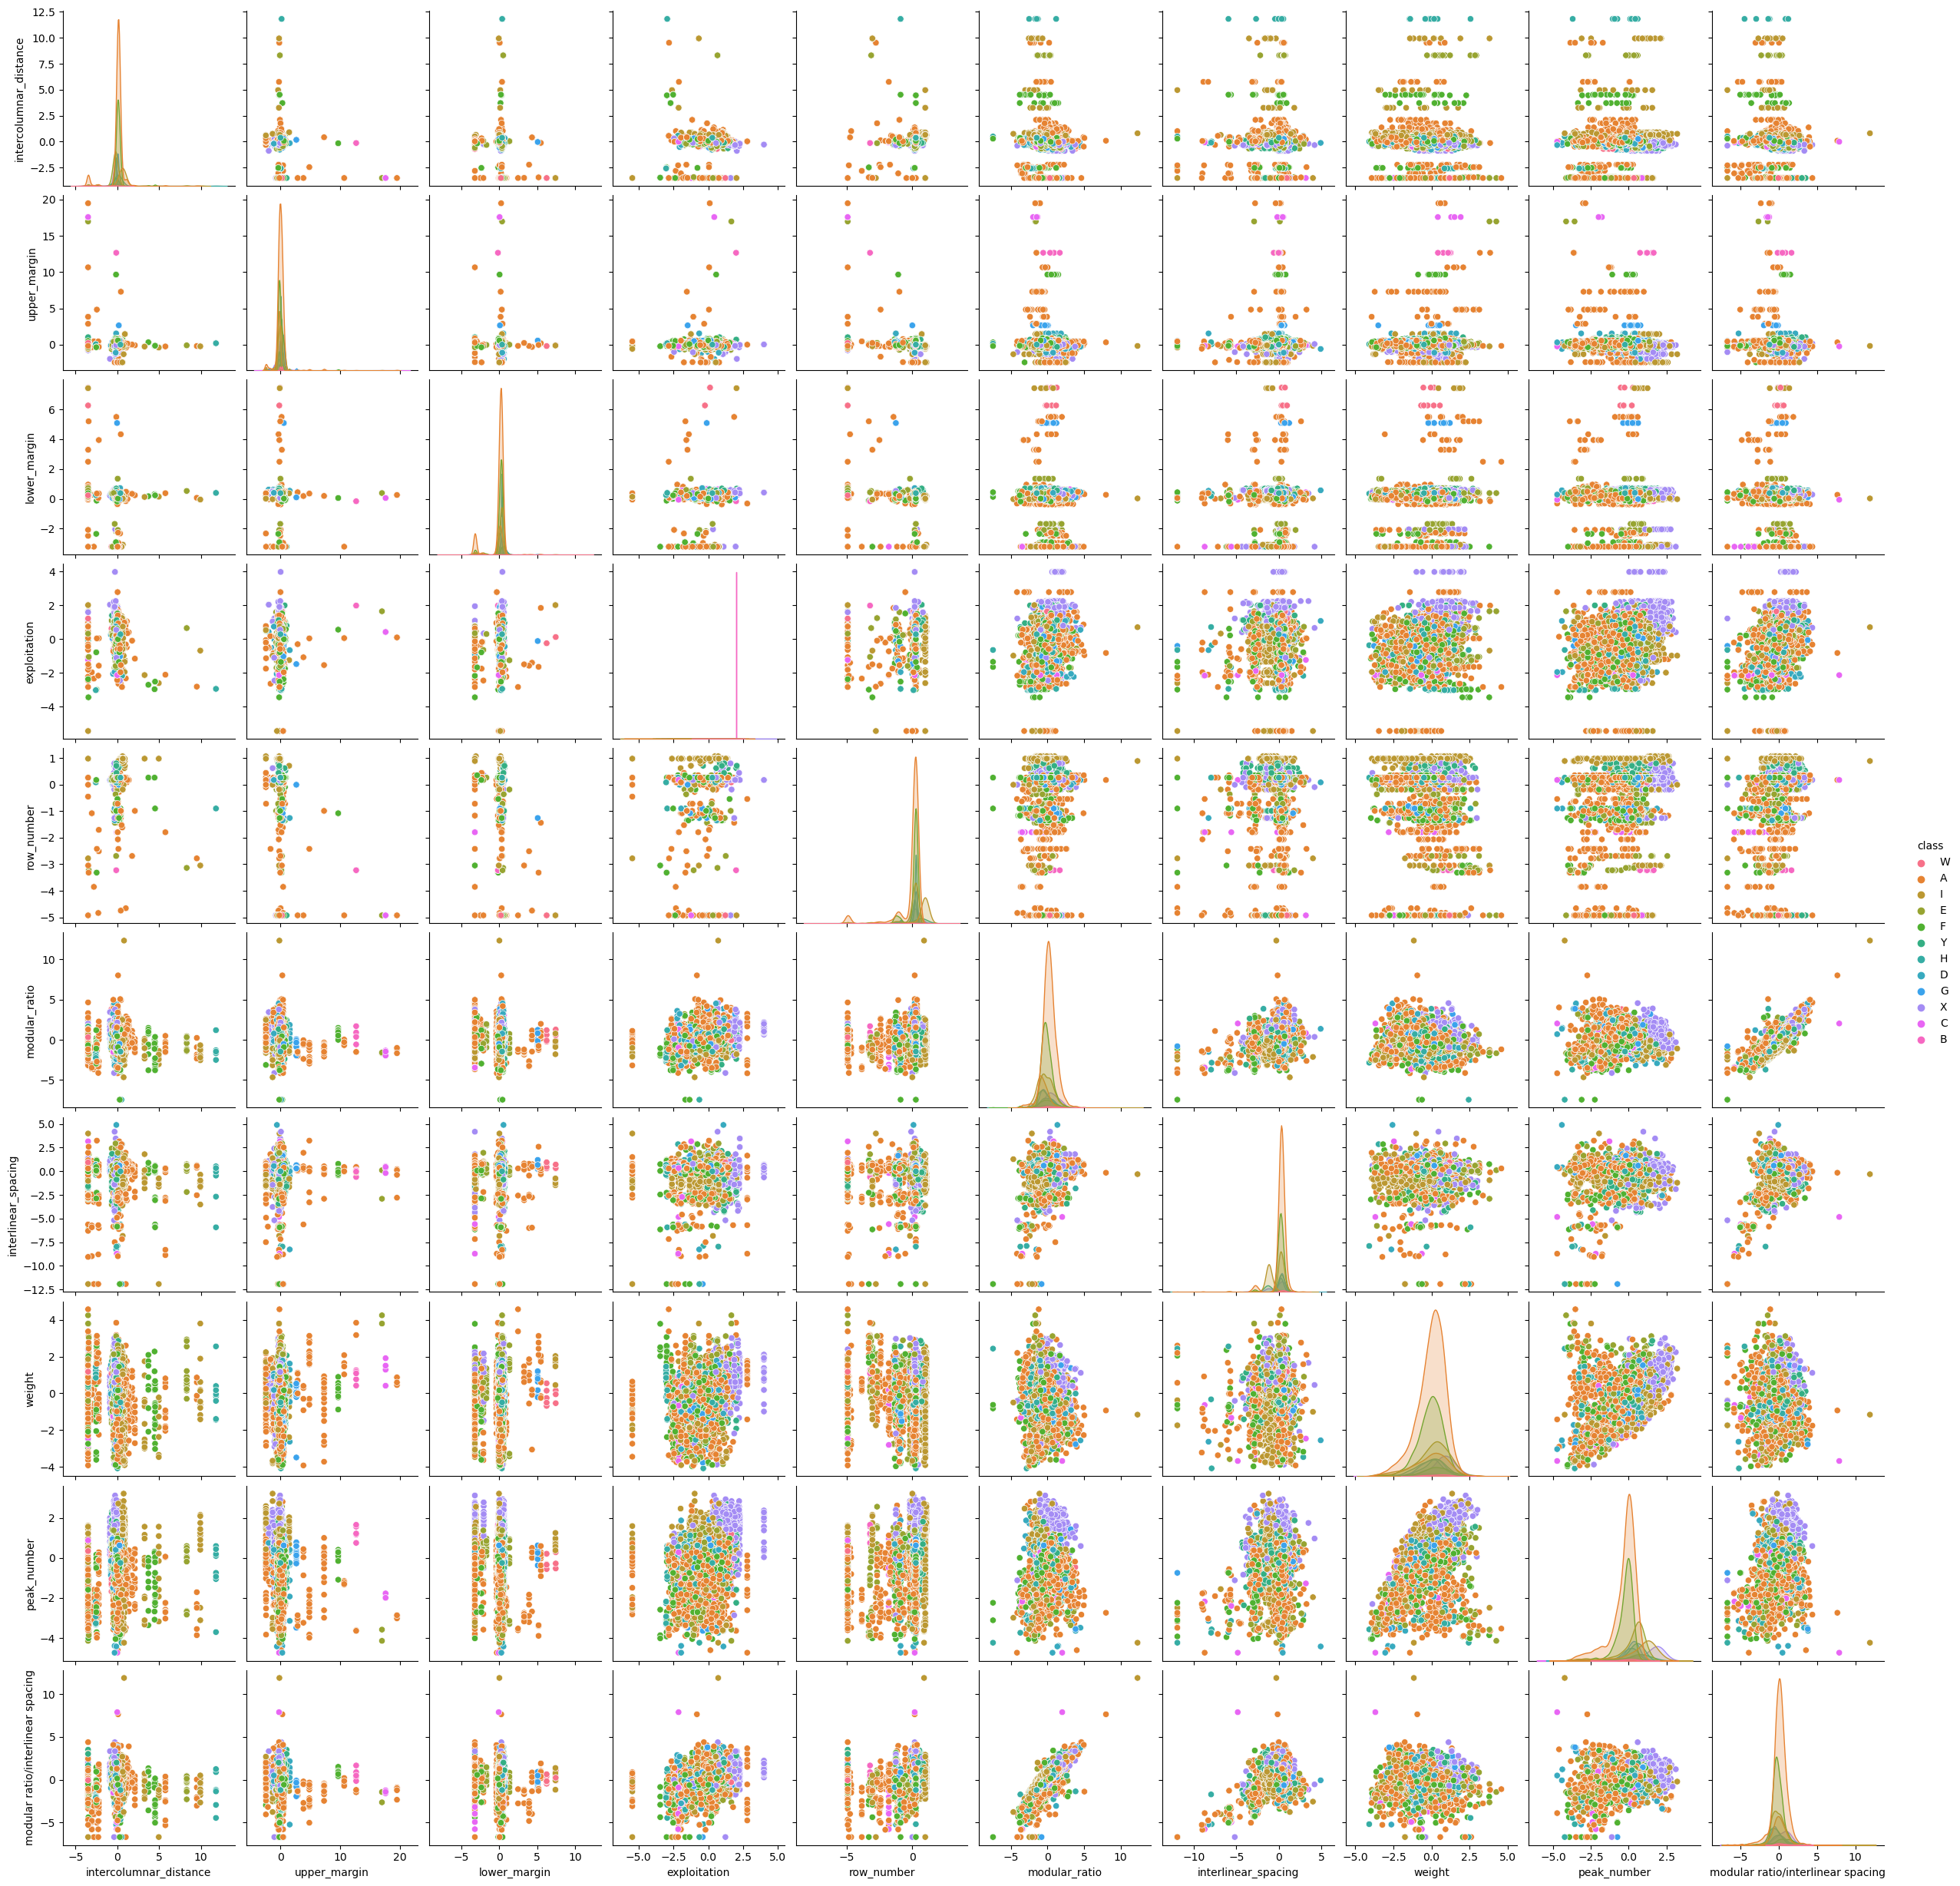

In [25]:
sns.pairplot(data=ts,diag_kind='kde',hue='class')
plt.show()

<li>There doesn't seem to be any apparent relationship amongst variables(linear or otherwise)</li>
<li>Most of the datapoints overlap for any two given features</li>
<li>Let's carry on with training our model to classify the data</li>


# Pick out X(predictor(s)) and y(response) and scale them

In [26]:
X_train=tr.drop(columns="class")
y_train=tr['class']

X_test=ts.drop(columns='class')
y_test=ts['class']

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
## fit_transform takes all the values then standardize them
X_train=scaler.fit_transform(X_train)
##similarly do this for X_test
X_test=scaler.transform(X_test)


# Train and evaluate model

# KNN

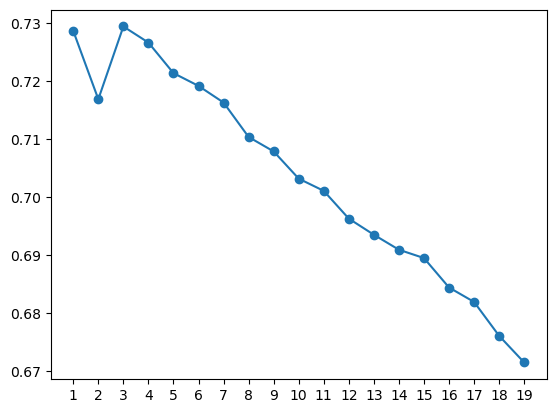

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kscores=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    s=knn.score(X_test,y_test)
    kscores.append(s)
plt.plot(range(1,20),kscores,"o-")
plt.xticks(range(1,20))
plt.show()


knn.fit(X_train, y_train): The fit method is called on the k-nearest neighbors classifier (knn). This method trains the classifier on the provided training data (X_train features and y_train labels).

s=knn.score(X_test, y_test): After training the classifier, the score method is used to calculate the accuracy of the classifier on the test data (X_test features and y_test labels). The accuracy score is computed by comparing the predicted labels with the actual labels and calculating the fraction of correct predictions.

kscores.append(s): The accuracy score (s) calculated in the previous step is added to the kscores list. This keeps track of the accuracy scores for different values of k.

In [41]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# y_pred= knn.predict(X_test)

knn_score=knn.score(X_test,y_test)
print(f"score : {knn_score}")

score : 0.7294241640318099


In [48]:
pred=knn.predict(X_test) 

In [86]:
def rightly_identified(actual,predictions):
    a=pd.DataFrame() #empty dataframe
    
    for i in np.sort(actual.unique()):
        try: #beacuse we get a key error if we use value_count()[i] when the given class i does not exist in the value_count()
            a.loc[i,'total_instances']=len(actual[actual==i]) #value count of a given class i
            a.loc[i,'identified_right']=pd.Series(predictions[actual==i]).value_counts()[i] #number of instances where a 
            a.loc[i,'%']=round(100*pd.Series(predictions[actual==i]).value_counts()[i]/len(actual[actual==i]),1) #prec
        except: #if the key error discussed above occurs,assign the percentage =0
              a.loc[i,'%']=0.0 
    return a


def con_matrix(actual,predictions):
    from sklearn.metrics import confusion_matrix
    
    matrix =pd.DataFrame(confusion_matrix (actual,predictions),columns=np.unique(actual),index=np.unique(actual))
    #confusion_matrix() returns the confusion matrix. wrapping this matrix in a dataframe with appropriate colums names and index
    matrix.loc[:,"total_count_actual_class"]= matrix.sum(axis=1) #sum accross the columns
    matrix.loc['total_count_predicted']=matrix.sum(axis=0) #row sum
    return matrix

In [82]:
pred_vs_actual_km=rightly_identified(y_test,pred)
pred_vs_actual_km

,total_instances,identified_right,%
A,4286.0,3636.0,84.8
B,5.0,5.0,100.0
C,103.0,41.0,39.8
D,353.0,162.0,45.9
E,1095.0,697.0,63.7
F,1962.0,1197.0,61.0
G,447.0,184.0,41.2
H,520.0,258.0,49.6
I,832.0,784.0,94.2
W,45.0,26.0,57.8


In [87]:
con_matrix(y_test,pred)

,A,B,C,D,E,F,G,H,I,W,X,Y,total_count_actual_class
A,3636,0,2,16,56,487,39,39,2,2,4,3,4286
B,0,5,0,0,0,0,0,0,0,0,0,0,5
C,34,0,41,6,9,11,0,2,0,0,0,0,103
D,102,0,5,162,42,36,0,4,1,0,1,0,353
E,214,0,8,36,697,59,15,51,0,0,13,2,1095
F,685,0,1,12,19,1197,30,16,2,0,0,0,1962
G,146,0,0,1,30,71,184,14,0,0,1,0,447
H,146,0,4,3,40,60,8,258,0,0,1,0,520
I,25,0,0,2,4,4,5,2,784,0,1,5,832
W,16,0,0,0,1,1,0,0,0,26,1,0,45


<li>All the 'B's were rightly identified to be 'B's</li>
<li>Understandably, the A's and F's were misidentified as eachother, even A and H</li>
<li>Not so understandably, A's and G's got misidentified</li>
